In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import torch
import torchtext
import csv
import torch.nn as nn
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_dir = '/content/drive/My Drive/Colab Notebooks/IMDB Reviews/'

def get_data():
  data = csv.reader(open(file_dir + "IMDB_Dataset.csv","rt", encoding="latin-1"))
  next(data)
  return data

for i,line in enumerate(get_data()):
  print(i,line)
  if line[2] == '0':

    print(line[0],line[1],line[2])
    break

0 ["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the

In [ ]:
glove = torchtext.vocab.GloVe(name="6B", dim=100, max_vectors = 25000)

.vector_cache/glove.6B.zip: 862MB [02:39, 5.39MB/s]                           
100%|█████████▉| 24999/25000 [00:01<00:00, 16829.15it/s]


In [ ]:
def split_review(review):
  review = review.replace("."," . ") \
                      .replace("?"," ? ") \
                      .replace(";"," ; ") \
                      .replace(","," , ") \
                      .replace("$"," $ ") \
                      .replace("-"," - ") \
                      .replace("(", " ( ") \
                      .replace(")", " ) ") \
                      .replace('"', ' " ') \
                      .replace("!", " ! ") \
                      .replace("'", " ' ") \

  words = review.lower().split()
  return words

In [ ]:
for i, line in enumerate(get_data()):
  if i > 50:
    break
  print(sum(int(w in glove.stoi) for w in split_review(line[0])))


353
172
187
149
244
148
168
201
143
37
93
190
413
122
57
167
155
261
131
153
356
219
83
387
173
126
646
152
147
682
471
381
120
726
291
435
111
332
140
320
129
228
203
291
213
257
77
167
773
104
462


In [ ]:
def get_reviews(glove_vectors):
  train = []
  validation = []
  test = []
  num_classes = 3
  for i, line in enumerate(get_data()):
    review = line[0]
    review_emb = sum(glove_vectors[j] for j in split_review(review))
    label_mapping = {"0": 0, "1": 1}
    label = torch.tensor(label_mapping[line[2]]).long()


    if i % 10 < 8:
      train.append((review_emb,label))
    elif i % 10 == 9:
      validation.append((review_emb,label))
    else:
      test.append((review_emb,label))

  return train, validation, test

In [ ]:
glove = torchtext.vocab.GloVe(name="6B", dim=100, max_vectors = 25000)

In [ ]:
train, validation, test = get_reviews(glove)

train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(validation, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

In [ ]:
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchtext
import numpy as np
import matplotlib.pyplot as plt

file_dir = '/content/drive/My Drive/Colab Notebooks/IMDB Reviews/'

def get_data():
  data = csv.reader(open(file_dir + "IMDB_Dataset.csv","rt", encoding="latin-1"))
  next(data)
  return data

for i,line in enumerate(get_data()):
  print(i,line)
  if line[2] == '0':

    print(line[0],line[1],line[2])
    break

def split_review(review):
  review = review.replace("."," . ") \
                      .replace("?"," ? ") \
                      .replace(";"," ; ") \
                      .replace(","," , ") \
                      .replace("$"," $ ") \
                      .replace("-"," - ") \
                      .replace("(", " ( ") \
                      .replace(")", " ) ") \
                      .replace('"', ' " ') \
                      .replace("!", " ! ") \
                      .replace("'", " ' ") \

  words = review.lower().split()
  return words

glove = torchtext.vocab.GloVe(name="6B", dim=100, max_vectors=25000) # use 20k most common words


0 ["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the

In [ ]:
def get_words(glove_vectors):
  train, valid, test = [],[],[]
  for i, line in enumerate(get_data()):

    review = line[0]

    idx = []

    for j in split_review(review):
      if j in glove_vectors.stoi:
        idx.append(glove_vectors.stoi[j])
      else:
        continue

    label_mapping = {"0": 0, "1": 1}
    label = torch.tensor(label_mapping[line[2]]).long()

    idx = torch.tensor(idx)

    if i % 10 < 8:
      train.append((idx,label))
    elif i % 10 == 9:
      valid.append((idx,label))
    else:
      test.append((idx,label))
  return train, valid, test

train, valid, test = get_words(glove)

In [ ]:
review, label = train[0]
print(review)
print(label)

review, label = train[1]

print(label)

review, label = train[2]
print(label)

review, label = train[3]
print(label)

tensor([   48,     3,     0,    68, 17961,    31,  3042,    12,    49,  2641,
          120,   176, 12961,  1942,    81,    57,    30, 12765,     2,    39,
           32,   248,     1,    19,    37,    14,  2796,   102,  1579,    17,
          285,     2,    58,   873,    12,  1869,   285,    59, 12961,    15,
           47, 13155,     5,  3468,     3,   714,     1,    42,   208,     6,
          248,    25,     0,  1388,   242,     2,  1853,   285,     1,    37,
           14,    36,     7,   273,    10,     0, 17173, 21360,    46,     2,
           37,   273, 11110,    84, 14771,    17,  9481,     4,  1603,     1,
         1739,    46,   714,     2,    47,    14, 16357,     1,     6,     0,
         2392,   234,     3,     0,  1388,     2,    14,   175, 12961,    19,
           12,    14,     0,  7398,   454,     4,     0, 17864,  2964,   194,
           92,     2,    20,  6545,  1674,    13, 19720,   115,     1,    29,
         6122,  1519,     3,     0,   997,   111,    64,     0, 

In [ ]:
emb = nn.Embedding.from_pretrained(glove.vectors)
print(review)
review_emb = emb(review)
print(review_emb.shape)
print(review_emb)
RNN_layer = nn.RNN(input_size = 100, hidden_size = 100, batch_first=True)

review_input = review_emb.unsqueeze(0)
print(review_emb)

out, last_hidden = RNN_layer(review_input)

print(out.shape)
print(last_hidden.shape)

tensor([ 5203,    63,    57,  1534,     7,   213,   111,     7,   333,  1606,
           23, 10146,    24,  4198,    63,    57,  1534,     7, 20374,     6,
           26, 12876,  1161,    26,  1108,    32,   798,    64,     0,    79,
            2,  1005,    14,  6914,    73,     7,  7318,  2832,     2,     2,
            2,     5,  3709,     1, 10146,  6038,     4,   399,     5,  1916,
            0, 20374,     2,     1,    58,     3,    64,    61,    81,    57,
         1765,   222,     4,   159,     7,   319,    81,   390,  2099,    83,
           47,     7,  8965,    46,     7,  2692,   805,    19,     7,  2692,
            0,  1005,    14,     2,  1108,    32,  1161,  4990,   117,     6,
          567,   214,     2,     5,   127,    53,    33, 10146,    17,    26,
        12876,    42,  4366,  7401,    64,     0,   319,   805,    41,   287,
            4,   253,     7,   793,  1005,     1,     5,   773,    41,  3136,
            7,  2692,    17,    77, 15971,  8965,  4752,     2, 

In [ ]:
class MovieReviewGRU(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(MovieReviewGRU, self).__init__()
    self.emb = nn.Embedding.from_pretrained(glove.vectors)
    self.hidden_size = hidden_size
    self.rnn = nn.GRU(input_size, hidden_size, batch_first = True)
    self.fc = nn.Linear(hidden_size, num_classes)


  def forward(self, x):

    x = self.emb(x)
    h0 = torch.zeros(1, x.size(0), self.hidden_size)
    out, _ = self.rnn(x, h0)
    out = self.fc(out[:, -1, :])
    return out

model = MovieReviewGRU(100, 100, 2)

In [ ]:
for i in range(20):
  review, label = train[i]
  print(review.shape,label)

torch.Size([353]) tensor(1)
torch.Size([172]) tensor(1)
torch.Size([187]) tensor(1)
torch.Size([149]) tensor(0)
torch.Size([244]) tensor(1)
torch.Size([148]) tensor(1)
torch.Size([168]) tensor(1)
torch.Size([201]) tensor(0)
torch.Size([93]) tensor(0)
torch.Size([190]) tensor(0)
torch.Size([413]) tensor(0)
torch.Size([122]) tensor(0)
torch.Size([57]) tensor(1)
torch.Size([167]) tensor(0)
torch.Size([155]) tensor(1)
torch.Size([261]) tensor(0)
torch.Size([356]) tensor(1)
torch.Size([219]) tensor(0)
torch.Size([83]) tensor(1)
torch.Size([387]) tensor(0)


In [ ]:
from torch.nn.utils.rnn import pad_sequence

review_padded = pad_sequence([review for review, label in train[:20]],
                            batch_first=True)

for i in range(20):
  print(review_padded[i].shape)

out = model(review_padded)



torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])
torch.Size([413])


In [ ]:
import random

class Batching:
  def __init__(self,review,batch_size = 32, drop_last = False):
    self.reviews_by_length = {}

    for words, labels in review:

      word_length = words.shape[0]
      if word_length in self.reviews_by_length.keys():
        self.reviews_by_length[word_length].append((words,labels))

      else:
        self.reviews_by_length[word_length] = []
        self.reviews_by_length[word_length].append((words,labels))

      self.loaders = {word_length : torch.utils.data.DataLoader(
                                    sentences,
                                    batch_size=batch_size,
                                    shuffle=True,
                                    drop_last=drop_last) # omit last batch if smaller than batch_size
                     for word_length, sentences in self.reviews_by_length.items()}


  def __iter__(self):

    iters = [iter(loader) for loader in self.loaders.values()]
    while iters:
      im = random.choice(iters)
      try:
        yield next(im)
      except StopIteration:
        iters.remove(im)

In [ ]:
for i, (reviews, labels) in enumerate(Batching(train, drop_last=True)):
    if i > 20:
      break

In [ ]:
def get_accuracy(model, data_loader):
  correct, total = 0.0, 0.0
  for reviews, labels in data_loader:
    output = model(reviews)
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += labels.shape[0]
  return correct / total

test_loader = Batching(test, batch_size=64, drop_last=False)
get_accuracy(model, test_loader)

0.4898

In [ ]:
def train_rnn_network(model, train, valid, num_epochs=5, learning_rate=1e-5):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses, train_acc, valid_acc = [], [], []
    epochs = []
    for epoch in range(num_epochs):
        for sentences, labels in train:
            optimizer.zero_grad()
            pred = model(sentences)
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
        losses.append(float(loss))

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, train_loader))
        valid_acc.append(get_accuracy(model, valid_loader))
        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
              epoch+1, loss, train_acc[-1], valid_acc[-1]))
    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

Epoch 1; Loss 0.426348; Train Acc 0.776164; Val Acc 0.773600
Epoch 2; Loss 0.371672; Train Acc 0.801457; Val Acc 0.795600
Epoch 3; Loss 0.587763; Train Acc 0.807139; Val Acc 0.799800
Epoch 4; Loss 0.328408; Train Acc 0.836235; Val Acc 0.830000
Epoch 5; Loss 0.292890; Train Acc 0.850073; Val Acc 0.840800
Epoch 6; Loss 0.251690; Train Acc 0.863361; Val Acc 0.855400
Epoch 7; Loss 0.351108; Train Acc 0.867531; Val Acc 0.859800
Epoch 8; Loss 0.290473; Train Acc 0.871655; Val Acc 0.863200
Epoch 9; Loss 0.358739; Train Acc 0.868631; Val Acc 0.855800
Epoch 10; Loss 0.317706; Train Acc 0.882011; Val Acc 0.873200
Epoch 11; Loss 0.253662; Train Acc 0.882056; Val Acc 0.870800
Epoch 12; Loss 0.366833; Train Acc 0.883156; Val Acc 0.870800
Epoch 13; Loss 0.290971; Train Acc 0.888105; Val Acc 0.877600
Epoch 14; Loss 0.346798; Train Acc 0.890258; Val Acc 0.876600
Epoch 15; Loss 0.338262; Train Acc 0.894016; Val Acc 0.880800
Epoch 16; Loss 0.200488; Train Acc 0.896857; Val Acc 0.878200
Epoch 17; Loss 0.

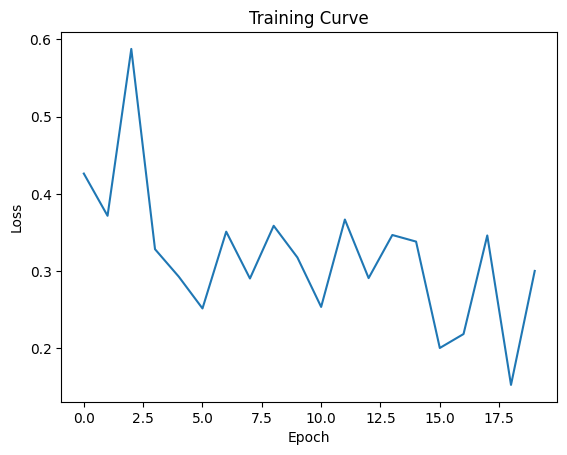

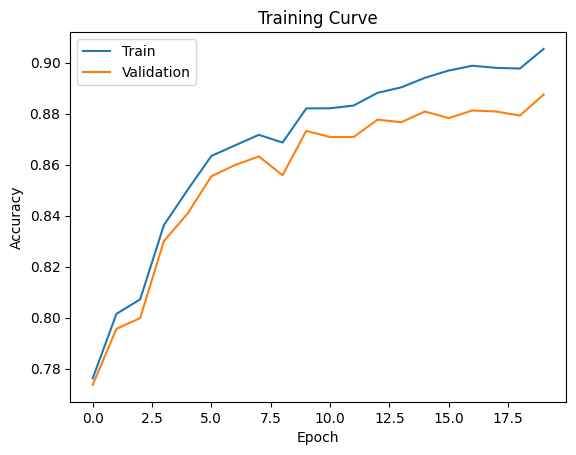

0.8854

In [ ]:
model = MovieReviewGRU(100, 100, 2)
train_loader = Batching(train, batch_size=64, drop_last=True)
valid_loader = Batching(valid, batch_size=64, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=20, learning_rate=0.0002)
get_accuracy(model, test_loader)

In [ ]:
def new_reviews(glove_vector, sample_review):
  review = sample_review
  idx = [glove_vector.stoi[w] for w in split_review(review) if w in glove_vector.stoi]
  idx = torch.tensor(idx)
  return idx

def sentiment_reader(output):
  scalar = (output.squeeze(0)[0]).item()
  mapping = {0 : "negative", 1 : "positive"}
  return mapping[scalar]

In [ ]:
new_review = new_reviews(glove, "I cannot believe how poor this movie was")
print(new_review.shape)

out = torch.sigmoid(model(new_review.unsqueeze(0)))
pred = out.max(1, keepdim=True)[1]
sentiment_reader(pred)

torch.Size([8])


'negative'